<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/Fuji_descent_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

csv_path = "/content/drive/MyDrive/Colab Notebooks/mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

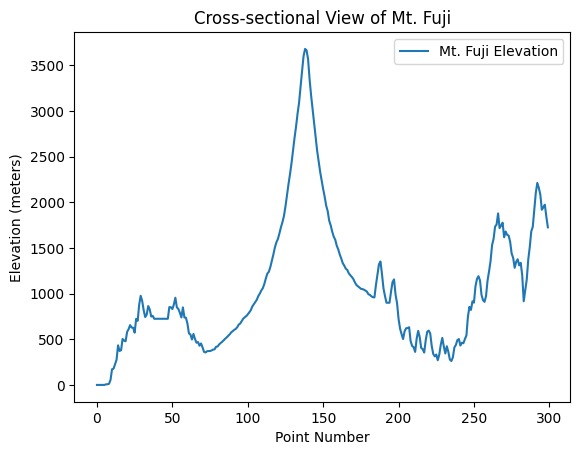

In [ ]:
point_number = fuji[:, 0]
elevation = fuji[:, 3]

plt.plot(point_number, elevation, label='Mt. Fuji Elevation')

plt.xlabel('Point Number')
plt.ylabel('Elevation (meters)')
plt.title('Cross-sectional View of Mt. Fuji')
plt.legend()

plt.show()

##Problem 2

In [ ]:
def calculate_gradient(elevation_data, point_number):
  current_point = int(point_number)
  current_elevation = elevation_data[current_point]

    # Ensure not to go below index 0
  next_point_number = max(0, current_point - 1)
  next_elevation = elevation_data[next_point_number]

    # Calculate the gradient using finite differences
  gradient = (current_elevation - next_elevation) / (current_point - next_point_number)

  return gradient

##Problem 3

In [ ]:
def calculate_destination_point(current_point, current_gradient, alpha=0.2):
  destination_point_float = current_point - alpha * current_gradient
  destination_point = round(destination_point_float)
  destination_point = max(0, min(destination_point, len(elevation) - 1))
  return destination_point
  current_point = 10
  current_gradient = calculate_gradient(elevation, current_point)

  destination_point = calculate_destination_point(current_point, current_gradient)
  print(f"Destination point: {destination_point}")

## Problem 4

In [ ]:
def descend_mountain(start_point, alpha=0.2):
  descent_path = [start_point]
  current_point = start_point

  while True:
    current_gradient = calculate_gradient(elevation, current_point)
    destination_point = calculate_destination_point(current_point, current_gradient, alpha)
    if destination_point == current_point:
      break
      current_point = destination_point
      descent_path.append(current_point)
    return descent_path

    start_point = 136
    descent_path = descend_mountain(start_point)
    print(f"Descent_path: {descent_path}")

## Problem 5

<ipython-input-19-6e2a44382798>:10: RuntimeWarning: invalid value encountered in double_scalars
  gradient = (current_elevation - next_elevation) / (current_point - next_point_number)


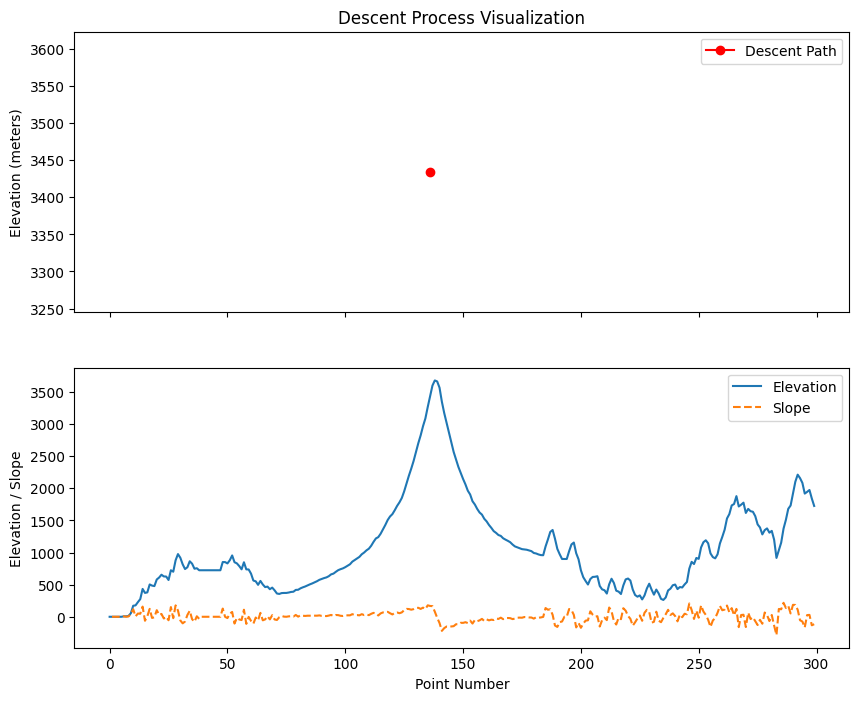

In [ ]:
def plot_descent_process(elevation_data, descent_path):
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

  ax1.plot(descent_path, [elevation_data[i] for i in descent_path], 'ro-', label='Descent Path')
  ax1.set_ylabel('Elevation (meters)')
  ax1.set_title('Descent Process Visualization')
  ax1.legend()

  gradient_data = [calculate_gradient(elevation_data, i) for i in range(len(elevation_data))]
  ax2.plot(elevation_data, label='Elevation')
  ax2.plot(gradient_data, label='Slope', linestyle='--')
  ax2.set_xlabel('Point Number')
  ax2.set_ylabel('Elevation / Slope')
  ax2.legend()

  plt.show()

start_point = 136  # Starting near the summit
descent_path = descend_mountain(start_point)

plot_descent_process(elevation, descent_path)

## Problem 6

In [ ]:
def descend_mountain(start_point, alpha=0.2):
  descent_path = [start_point]
  current_point = start_point

  while True:
    current_gradient = calculate_gradient(elevation, current_point)
    destination_point = calculate_destination_point(current_point, current_gradient, alpha)
    if destination_point == current_point:
      break
      current_point = destination_point
      descent_path.append(current_point)
    return descent_path

    start_point_custom = 50
    descent_path_custom = descend_mountain(start_point_custom)
    print(f"Descent Path (Starting from point {start_point_custom}): {descent_path_custom}")

## Problem 7

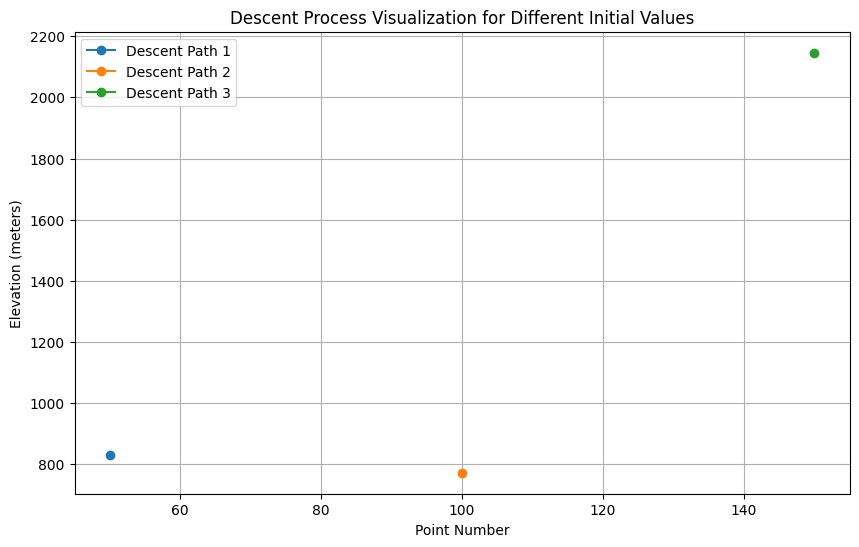

In [ ]:
def plot_multiple_descent_paths(elevation_data, descent_paths):

    plt.figure(figsize=(10, 6))

    for i, path in enumerate(descent_paths):
        plt.plot(path, [elevation_data[p] for p in path], label=f'Descent Path {i + 1}', marker='o')

    plt.xlabel('Point Number')
    plt.ylabel('Elevation (meters)')
    plt.title('Descent Process Visualization for Different Initial Values')
    plt.legend()
    plt.grid(True)
    plt.show()




start_points = [50, 100, 150]
descent_paths = [descend_mountain(start_point) for start_point in start_points]
plot_multiple_descent_paths(elevation, descent_paths)

## Problem 8

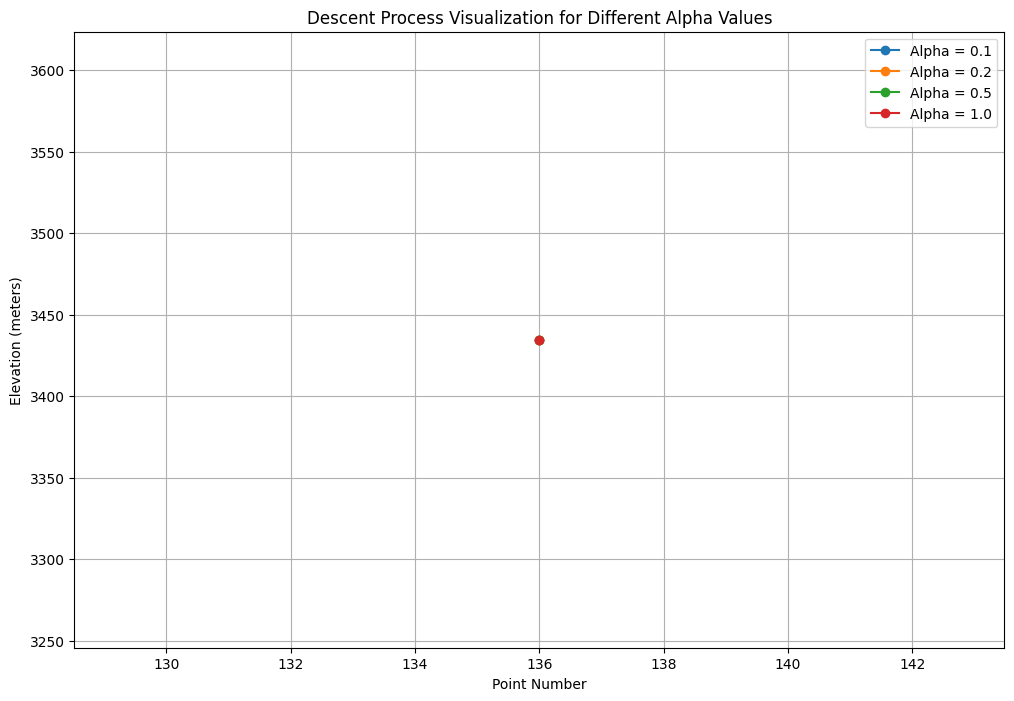

In [ ]:
def plot_descent_process_with_alpha(elevation_data, start_point, alphas):

    plt.figure(figsize=(12, 8))

    for alpha in alphas:
        descent_path = descend_mountain(start_point, alpha)
        plt.plot(descent_path, [elevation_data[p] for p in descent_path], label=f'Alpha = {alpha}', marker='o')

    plt.xlabel('Point Number')
    plt.ylabel('Elevation (meters)')
    plt.title('Descent Process Visualization for Different Alpha Values')
    plt.legend()
    plt.grid(True)
    plt.show()



start_point_alpha = 136
alpha_values = [0.1, 0.2, 0.5, 1.0]
plot_descent_process_with_alpha(elevation, start_point_alpha, alpha_values)